### 3) 다중회귀(Multiple Regression)
여러개 독립변수가 복합적으로 종속변수에 영향을 미치는 경우 사용한다. 모델이 복잡해지면 과대적합 발생 가능성이 있어 다양한 규제를 적용해 모델 가중치를 제한한다.

##### 3-1) 변수선택법
- 규제가 있는 다항회귀모델(릿지, 라소) : 계수추정치 제한/규칙화하는 기법(회귀계수 0으로 수축하기 위한 방식)

<b><팁></b> 릿지회귀가 최소제곱법보다 나은 이유는 편향-분산 트레이드오프 관점에서 살펴볼수 있다. 알파가 증가하면 릿지회귀 적합의 유연성은 줄어들어 편향은 증가하지만 분산은 감소한다 -> 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있다.

In [23]:
# Ridge
from sklearn.datasets import load_diabetes   # 당뇨데이터
import pandas as pd

data=load_diabetes()
x=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target

x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [25]:
from sklearn.linear_model import Ridge

# RidgeMSE alpha값에 따라 다르게 설정되는 릿지회귀계수를 df에 저장하여 출력
alpha=np.logspace(-3,1,5)

data=[]
for i,a in enumerate(alpha):
    ridge=Ridge(alpha=a)
    ridge.fit(x,y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


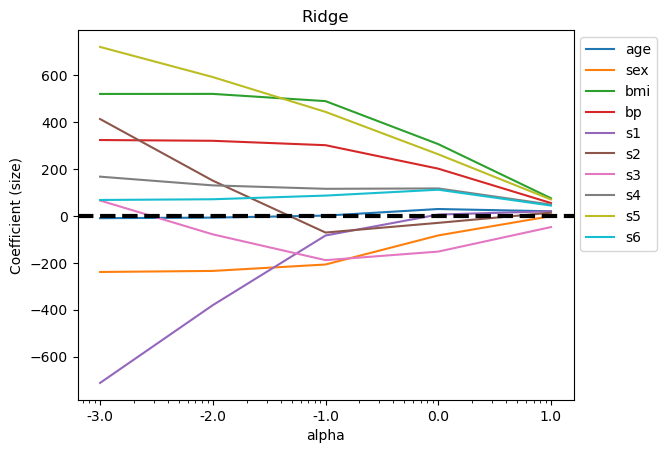

In [48]:
# alpha값이 증가하면서 회귀계수 값이 0에 수렵하는지 시각화
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

# 알파값이 점점 증가하면서 회귀계수가 0에 가까워지는 것을 확인할 수 있다.

In [ ]:
# MSE를 사용한 회귀모델과 비교 (alpha=0일때와 같은 효과)
# 179p